# Part 1: Exploratory Data Analysis
https://prod.flbog.net:4445/pls/apex/f?p=140:1:0.

This first part involves importing the dataset, addressing null values, filtering and sorting, and creating some helpful plots. This purpose is get an idea of what this dataset is consisted of before building any models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.stats.api as sms
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

In [3]:
df = pd.read_csv("/Users/bychen/Downloads/data.csv", encoding="ISO-8859-1")

Explanation of Columns

* University: What university the employee works at
* Name: Name of employee
* Employee Type: Salaried or other personal services (OPS)
* Job category: 13 categories, like faculty admin, lower level executive, etc
* Class title: Job name
* Annual compensation: How much they earned per year
* Funding source: 13 categories, how their salary is funded
* FTE: Full time equivalent; 1 is 40 hours a week, 0.5 is 20 hours a week, and so on

In [4]:
df.head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
0,FAMU,William Thomson,Salaried,9,Senior Auditor,"$9,225.00",Auxiliary,0.12
1,FAMU,Ayinde Madzimoyo,Salaried,6,Assistant Professor,"$67,500.00",Education and General,1.00
2,FAMU,Brian Crowell,Salaried,9,"Instructor, Librarian","$51,897.74",Education and General,1.00


Some summary statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98292 entries, 0 to 98291
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           98292 non-null  object 
 1   Name                 98292 non-null  object 
 2   Employment Type      98292 non-null  object 
 3   Job Category         98292 non-null  int64  
 4   Class Title          95648 non-null  object 
 5   Annual Compensation  98292 non-null  object 
 6   Funding Source       98292 non-null  object 
 7   FTE                  98189 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 6.0+ MB


Annual compensation is an object here, not a float. Let's change this column.

In [6]:
df['Annual Compensation'] = df['Annual Compensation'].str.replace(',', '').str.replace('$', '')
df.columns = df.columns.str.strip()

In [7]:
df.head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
0,FAMU,William Thomson,Salaried,9,Senior Auditor,9225.00,Auxiliary,0.12
1,FAMU,Ayinde Madzimoyo,Salaried,6,Assistant Professor,67500.00,Education and General,1.00
2,FAMU,Brian Crowell,Salaried,9,"Instructor, Librarian",51897.74,Education and General,1.00


In [8]:
df['Annual Compensation'] = pd.to_numeric(df['Annual Compensation'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98292 entries, 0 to 98291
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           98292 non-null  object 
 1   Name                 98292 non-null  object 
 2   Employment Type      98292 non-null  object 
 3   Job Category         98292 non-null  int64  
 4   Class Title          95648 non-null  object 
 5   Annual Compensation  98292 non-null  float64
 6   Funding Source       98292 non-null  object 
 7   FTE                  98189 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.0+ MB


Nice. Before we go any further, let's get rid of null values.

In [9]:
df.isnull().sum()

University                0
Name                      0
Employment Type           0
Job Category              0
Class Title            2644
Annual Compensation       0
Funding Source            0
FTE                     103
dtype: int64

In [10]:
df[df["Class Title"].isnull()].head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
165,FAMU,Amita Jain,Salaried,6,NaN,"5,857.97",Contracts and Grants,0.15
281,FAMU,Andrew Rasmussen,Salaried,6,NaN,"2,355.15",Contracts and Grants,0.05
582,FAMU,Elizabeth Mazzio,Salaried,6,NaN,"88,621.20",Education and General,1.00


In [11]:
df[df["FTE"].isnull()].head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
2479,FAU,Graduate Assistant,OPS,5,Graduate Assistant,"1,360.00",Education and General,NaN
2556,FAU,Graduate Assistant,OPS,5,Graduate Assistant,"15,000.12",Education and General,NaN
2930,FAU,Graduate Assistant,OPS,5,Graduate Assistant,"7,650.00",Education and General,NaN


In [12]:
df["Class Title"] = df["Class Title"].fillna("Employee")
df["FTE"] = df["FTE"].fillna(df["FTE"].median())
df.isnull().sum()

University             0
Name                   0
Employment Type        0
Job Category           0
Class Title            0
Annual Compensation    0
Funding Source         0
FTE                    0
dtype: int64

I filled the null class titles with "Employee", and the null FTE with the median FTE. Now let's start by looking into the annual compensation column.

Text(0.5, 1.0, 'Annual Compensation Frequency Plot')

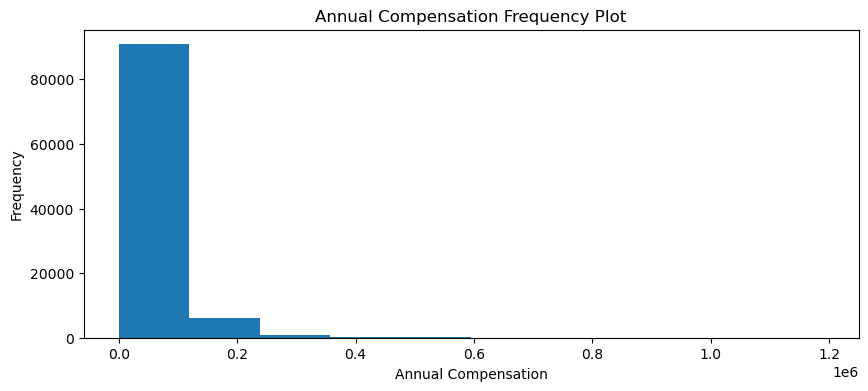

In [13]:
plt.figure(figsize=(10, 4))
plt.hist(df["Annual Compensation"])
plt.xlabel("Annual Compensation")
plt.ylabel("Frequency")
plt.title("Annual Compensation Frequency Plot")

Text(0.5, 1.0, 'Annual Compensation of Each Employee')

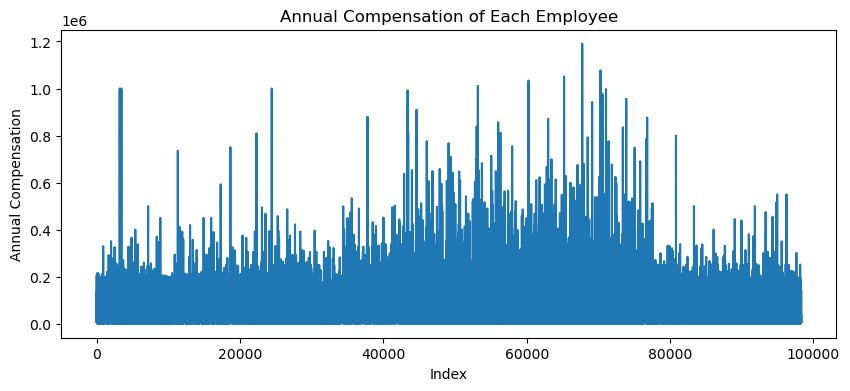

In [14]:
plt.figure(figsize=(10, 4))
df["Annual Compensation"].plot()
plt.xlabel("Index")
plt.ylabel("Annual Compensation")
plt.title("Annual Compensation of Each Employee")

Seems like most people make between 0 to 200,000 a year, while a few make up to 1.2M.

In [15]:
df["Annual Compensation"].describe()

count      98,292.00
mean       49,272.93
std        56,434.71
min             0.00
25%        10,377.39
50%        36,699.04
75%        66,720.57
max     1,190,487.10
Name: Annual Compensation, dtype: float64

The mean is much greater than the median. This is likely due to the few outliers raking in a lot of dough. I am very surprised that the median is only 37k, but looking at the dataset I notice that a lot of employees are not considered full time status. Let's look at some outliers.

In [16]:
df[df["Annual Compensation"] > 1000000]

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
24431,FSU,William Alford,Salaried,13,Vice President,"1,000,000.10",Intercollegiate Athletics,1.00
53188,UF,Wesley Fuchs,Salaried,6,Professor,"1,011,243.80",Contracts and Grants,1.00
60250,UF,Mark Bleiweis,Salaried,6,Professor,"1,033,827.19",Contracts and Grants,0.33
65213,UF,Mark Bleiweis,Salaried,6,Professor,"1,051,101.47",Contracts and Grants,0.67
67745,UF,Tomas Martin,Salaried,6,Professor,"1,190,487.10",Contracts and Grants,0.89
70289,UF,Daryoush Tavanaiepour,Salaried,7,Associate Professor,"1,076,976.02",Contracts and Grants,0.97


Good to see that the top 5 highest earners are all UF faculty (suck it FSU!) I also notice that Mark Bleiweis is entered twice, and his salary seems to be broke up into 2 rows. I'll definitely look into that in a second. Let's check out the low end of this dataset.

In [17]:
df[df["Annual Compensation"] < 1000].head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
213,FAMU,Ronald Williams,Salaried,6,Professor,10.00,Contracts and Grants,0.26
452,FAMU,Shaylor James,OPS,5,Professor,499.15,Education and General,0.03
740,FAMU,Benjamin Mwashote,OPS,5,Instructor,499.04,Education and General,0.03


In [18]:
df[df["Annual Compensation"]==0]

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
62253,UF,Graduate Assistant,OPS,5,Graduate Assistant,0.00,Contracts and Grants,0.50


I think some of these low earning employees were hired for a short time for some task, which would result in their low FTEs. I'll probably remove them when making my model later on. Let's look at repeated names.

In [19]:
repeated_names = df['Name'].value_counts()[df['Name'].value_counts() > 1]
repeated_names.head(5)

Name
Graduate Assistant      15490
Jeffrey Krischer           24
Lisa Hightow-Weidman       22
Sylvie Naar                21
Coy Heldermon              20
Name: count, dtype: int64

In [20]:
df[df["Name"] == "Graduate Assistant"].head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
15,FAMU,Graduate Assistant,OPS,5,Graduate Assistant,"16,731.00",Student Activity,0.50
17,FAMU,Graduate Assistant,OPS,5,Graduate Assistant,"22,393.80",Contracts and Grants,0.50
30,FAMU,Graduate Assistant,OPS,5,Graduate Teaching Assistant,"10,002.80",Education and General,0.50


In [21]:
df[df["Name"] == "Graduate Assistant"]["FTE"].mean()

0.40368085861846353

Seems like most of these graduate assistants are counted as working part time. I think they'll still be useful in the model so I'll probably keep them.

In [22]:
df[df["Name"] == "Jeffrey Krischer"].head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
80140,USF,Jeffrey Krischer,Salaried,7,Graduate Research Professor,"2,121.00",Contracts and Grants,0.01
80944,USF,Jeffrey Krischer,Salaried,7,Graduate Research Professor,"2,121.00",Health Or Medical Center,0.01
81821,USF,Jeffrey Krischer,Salaried,7,Graduate Research Professor,"42,419.00",Contracts and Grants,0.10


For people like this with multiple rows detailing their salary breakdown, I'll probably remove them through the process of removing rows with low FTEs. Let's now look at full time employees.

In [23]:
full_time = df[df["FTE"] == 1]
full_time["Annual Compensation"].describe()

count      40,097.00
mean       73,765.26
std        47,866.00
min             1.00
25%        45,752.61
50%        61,800.00
75%        87,992.19
max     1,011,243.80
Name: Annual Compensation, dtype: float64

In [24]:
full_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40097 entries, 1 to 98290
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           40097 non-null  object 
 1   Name                 40097 non-null  object 
 2   Employment Type      40097 non-null  object 
 3   Job Category         40097 non-null  int64  
 4   Class Title          40097 non-null  object 
 5   Annual Compensation  40097 non-null  float64
 6   Funding Source       40097 non-null  object 
 7   FTE                  40097 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


Sorting by full time cuts our dataset from 90,000 entries to 40,000, which isn't too bad. The median salary for full time employees is 62k a year, which makes a lot more sense. Let's check out some other columns.

In [25]:
comp_by_uni = full_time.groupby("University")["Annual Compensation"].median()
comp_by_uni = comp_by_uni.sort_values()
print(comp_by_uni)

University
UF     55,769.08
USF    60,255.00
FSU    62,032.79
UNF    63,000.00
FAMU   63,345.00
FGCU   63,552.56
UWF    63,628.00
FIU    63,819.39
UCF    65,000.00
NCF    67,911.51
FAU    68,577.00
FPU    74,000.00
Name: Annual Compensation, dtype: float64


Text(0.5, 1.0, 'Median Compensation for each University')

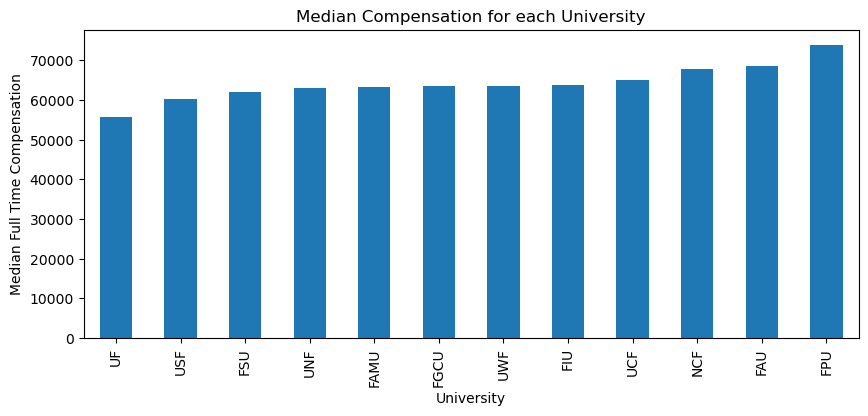

In [26]:
plt.figure(figsize=(10, 4))
comp_by_uni.plot(kind = "bar")
plt.ylabel("Median Full Time Compensation")
plt.title("Median Compensation for each University")

Was not expecting UF to be the lowest. I wonder if it has to do with the abundance of administrators here who maybe aren't paid much. Let's look at salaries for professors only.

In [27]:
prof = full_time[full_time["Class Title"] == "Professor"]
prof_by_school_comp = prof.groupby("University")["Annual Compensation"].median()
prof_by_school_comp = prof_by_school_comp.sort_values()
print(prof_by_school_comp)

University
NCF     93,309.87
FGCU   108,360.68
FAMU   109,980.53
UNF    112,221.10
UWF    118,047.00
FAU    124,555.92
FIU    129,874.18
UF     134,663.85
USF    134,877.00
FSU    141,671.70
UCF    155,842.77
FPU    179,945.17
Name: Annual Compensation, dtype: float64


Text(0.5, 1.0, 'Median Compensation for Professors for each University')

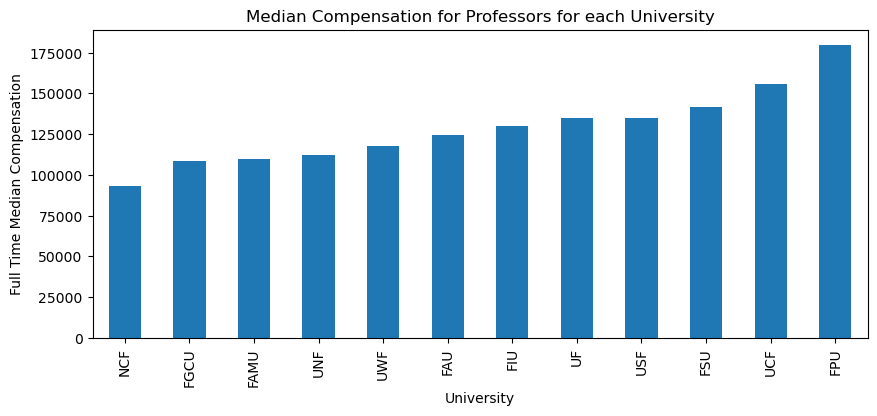

In [28]:
plt.figure(figsize=(10, 4))
prof_by_school_comp.plot(kind = "bar")
plt.ylabel("Full Time Median Compensation")
plt.title("Median Compensation for Professors for each University")

This makes a little more sense. Damn, FPU professors are making bank. I wonder if it's because they only have like 3 professors.

In [29]:
prof[prof["University"] == "FPU"]

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
20874,FPU,Terence Parker,Salaried,13,Professor,"364,963.32",Education and General,1.00
20936,FPU,Muhammad Rashid,Salaried,6,Professor,"165,056.32",Education and General,1.00
21055,FPU,Kathryn Miller,Salaried,12,Professor,"179,945.17",Education and General,1.00


Yep, no wonder. I actually guessed correctly the number of professors they have. Not surprising given that their enrollment is around 1000 students. They do have a cool building though. I want to check out the salaries for each job title.

In [30]:
comp_by_title = full_time.groupby("Class Title")["Annual Compensation"].median()
print(comp_by_title)

Class Title
Acad Assessment Professional     59,999.99
Acad Person Admin Spec I         54,199.32
Academic Advisor                 47,100.00
Academic Advisor (A&P)           45,572.57
Academic Advisor I               47,660.00
                                    ...   
Workers' Compensation Spec       57,815.10
Writer                           44,607.74
Writer I                         49,350.00
Writer Ii                        68,500.00
Zone Manager, High Performance   63,804.50
Name: Annual Compensation, Length: 5391, dtype: float64


Seems like the class title is not standardized. Let's use the job category instead. Keep in mind that:

* 1 = Core Operational and Support Staff
* 2 = Core Operational Supervisor
* 3 = Specialized Technical
* 4 = Non-Faculty Supplementary Personnel
* 5 = Temporary Instruction
* 6 = Full-Time Instruction
* 7 = Faculty Administrators
* 8 = Professionalized Occupation
* 9 = Professional
* 10 = Lower Level Managerial
* 11 = Higher Level Managerial
* 12 = Lower Level Executive
* 13 = Upper Level Executive

In [31]:
full_time.columns = full_time.columns.str.strip()
comp_by_job = full_time.groupby("Job Category")["Annual Compensation"].median()
print(comp_by_job)

Job Category
1     36,588.02
2     49,840.21
3     45,550.50
4     46,326.21
5     55,000.00
6     90,000.00
7    135,256.00
8     56,650.00
9     59,627.00
10    75,809.00
11   110,000.00
12   179,550.00
13   252,324.41
Name: Annual Compensation, dtype: float64


Text(0.5, 1.0, 'Median Compensation for each Job')

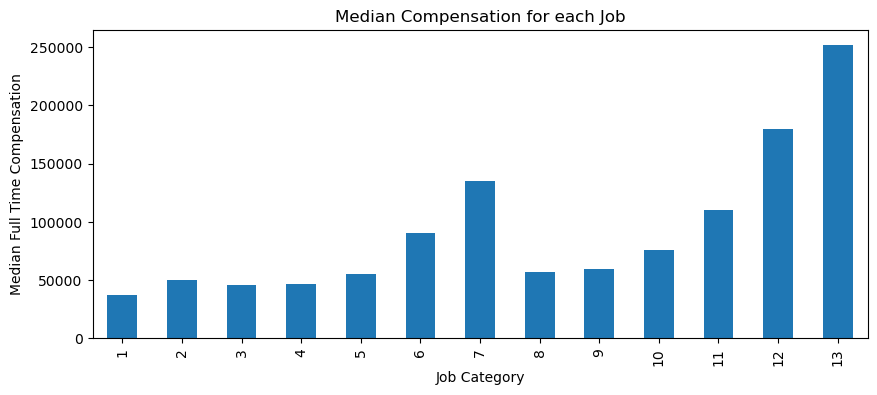

In [32]:
plt.figure(figsize=(10, 4))
comp_by_job.plot(kind = "bar")
plt.ylabel("Median Full Time Compensation")
plt.title("Median Compensation for each Job")

Upper level executives seem to be making the most, followed by lower level executives. Supporting staff are paid the least. Let' see how many employees of each job category are in each university.

Text(0.5, 1.0, 'Counts of each Job for each University')

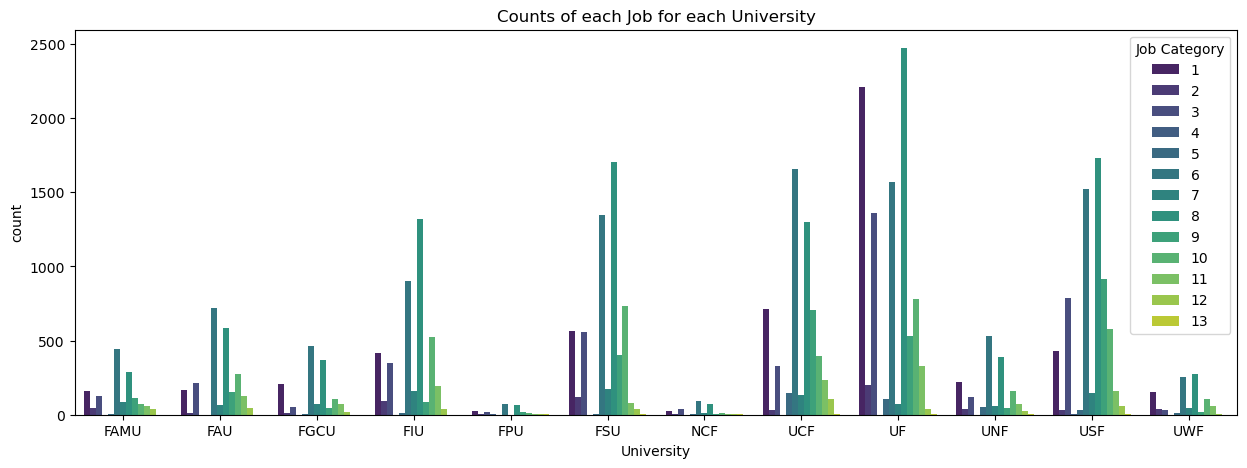

In [33]:
jobs_by_uni = full_time.groupby(["University", "Job Category"]).size().unstack(fill_value=0)
plt.figure(figsize=(15, 5))
sns.countplot(data=full_time, x="University", hue="Job Category", palette="viridis")
plt.title("Counts of each Job for each University")

It's interesting that UF has significantly more employees than UCF despite having less students. UF also has a lot of support staff (category 1), which might explain why the analysis earlier showed that UF has the lowest median salary overall. Let's now pivot to looking at the funding source and its relation to annual compensation to see if we can find any patterns.

Text(0.5, 1.0, 'Median Compensation for each Funding Source')

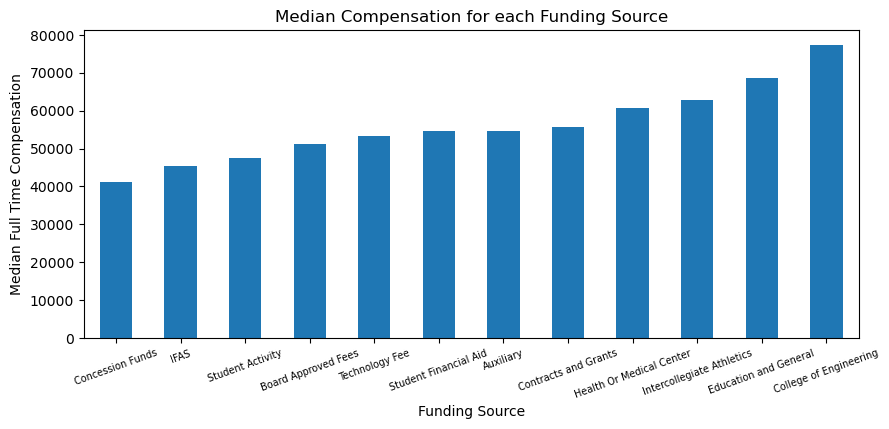

In [34]:
plt.figure(figsize=(10, 4))
comp_by_fund = full_time.groupby("Funding Source")["Annual Compensation"].median()
comp_by_fund = comp_by_fund.sort_values()
comp_by_fund.plot(kind = "bar")
plt.ylabel("Median Full Time Compensation")
plt.xticks(rotation=20, fontsize=7)
plt.title("Median Compensation for each Funding Source")

Interesting, but not super meaningful. Let's look at FTE now, which I think will be the most useful column.

<Axes: xlabel='FTE', ylabel='Annual Compensation'>

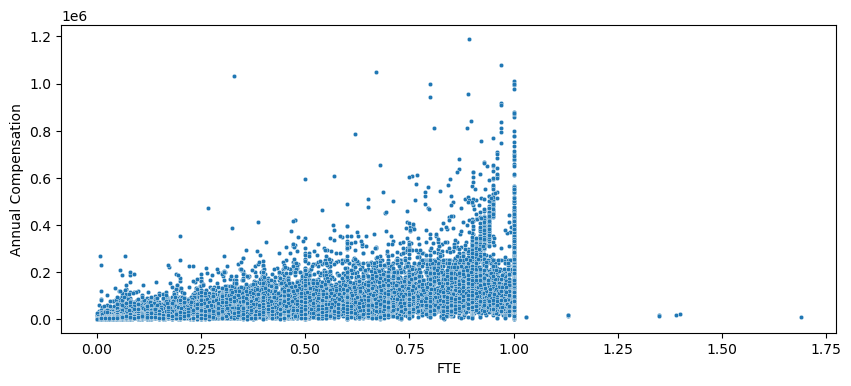

In [35]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x="FTE", y="Annual Compensation", s=10)

As expected, the more hours an employee works, the higher their compensation. The correlation is evident but it seems to be quite weak. There are also apparently some people who are working more than full time. Let's see who these people are.

In [36]:
df[df["FTE"]>1]

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
455,FAMU,Maria Dofing,OPS,5,Instructor,"21,000.00",Education and General,1.40
9492,FGCU,Andrei Ghelman,OPS,5,Instructor,"6,200.00",Education and General,1.03
10496,FGCU,Sean Kinsley,OPS,5,Instructor,"6,200.00",Education and General,1.03
47178,UF,Sandra Durham,Salaried,10,"Mgr, Human Resources","87,334.69",Education and General,1.00
49615,UF,Patricia Turner,Salaried,8,Research Coordinator Iii,"70,073.68",Contracts and Grants,1.00
55983,UF,Joseph Tarnecki,Salaried,8,Research Coordinator Ii,"51,985.25",Contracts and Grants,1.00
58814,UF,Douglas Phillips,Salaried,8,Research & Development Manager,"67,843.87",Contracts and Grants,1.00
74167,UF,Delainie Mcneil,Salaried,1,Executive Assistant I,"62,911.77",Education and General,1.00
96774,UWF,Joseph Wojciechowski,OPS,5,Faculty (Generic),"11,764.72",Education and General,1.13
97019,UWF,Kimberly Golson,OPS,5,Faculty (Generic),"14,117.68",Auxiliary,1.13


I think the UF employees that have FTE over 1 are just typos, like 1.001 for example. Let's round all FTE to nearest hundredths.

In [37]:
df['FTE'] = df['FTE'].round(2)
df[df["FTE"]>1]

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
455,FAMU,Maria Dofing,OPS,5,Instructor,"21,000.00",Education and General,1.40
9492,FGCU,Andrei Ghelman,OPS,5,Instructor,"6,200.00",Education and General,1.03
10496,FGCU,Sean Kinsley,OPS,5,Instructor,"6,200.00",Education and General,1.03
96774,UWF,Joseph Wojciechowski,OPS,5,Faculty (Generic),"11,764.72",Education and General,1.13
97019,UWF,Kimberly Golson,OPS,5,Faculty (Generic),"14,117.68",Auxiliary,1.13
97170,UWF,Yvonne Lebrun,OPS,5,Faculty (Generic),"14,352.96",Education and General,1.13
97702,UWF,Ramel Price,OPS,5,Faculty (Generic),"8,800.00",Education and General,1.69
98041,UWF,Julie Mcgrath,OPS,5,Faculty (Generic),"13,882.32",Education and General,1.13
98102,UWF,Christopher Sacco,OPS,5,Faculty (Generic),"16,533.36",Education and General,1.39
98184,UWF,Patricia Gleich,OPS,5,Faculty (Generic),"16,658.80",Education and General,1.35


Seems like all of the these are temporary instructors who are counted as part of other personal services (OPS). I'll probably drop all these rows when constructing my model.

# Part 2: Regression

In this second part, I will fit some regression models on the dataset, engineer some features, and see what type of predictions I get.

## Model 1

This will be my baseline model. I use the Job Category and FTE column to predict Annual Compensation. I will use the ordinary least squares method. To compare models, I will focus on the adjusted R squared and prediction errors, while taking into other metrics as well.

In [38]:
X = df[["Job Category", "FTE"]]
X = sm.add_constant(X)
y = df["Annual Compensation"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=69, train_size=0.8)

In [39]:
print(X.head())

   const  Job Category  FTE
0   1.00             9 0.12
1   1.00             6 1.00
2   1.00             9 1.00
3   1.00             3 1.00
4   1.00            12 1.00


In [40]:
m1 = sm.OLS(ytrain, Xtrain).fit()
print(m1.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.315
Model:                             OLS   Adj. R-squared:                  0.315
Method:                  Least Squares   F-statistic:                 1.809e+04
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                         10:27:40   Log-Likelihood:            -9.5697e+05
No. Observations:                78633   AIC:                         1.914e+06
Df Residuals:                    78630   BIC:                         1.914e+06
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.053e+04    522.383    

Both predictors, as well as the intercept, are statistically significant. The adjusted R squared is 0.315, which isn't too bad. The F statistic is in the 5 digits, which means that the model itself is extremely significant. Let's examine some residual plots.

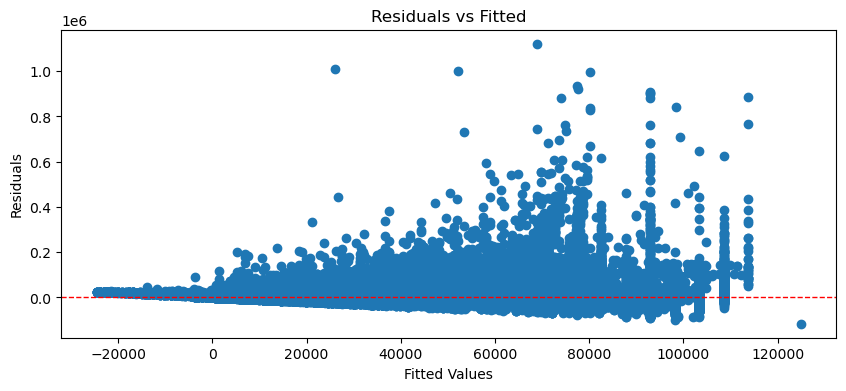

In [41]:
plt.figure(figsize=(10, 4))
plt.scatter(m1.fittedvalues, m1.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Not the best looking residuals vs fitted plot. There seems to be a lot more positive residuals than negative ones. Heteroskedasticity is present here as well, shown by the funnel shape of the residuals. Let's check for normality.

<Figure size 1000x400 with 0 Axes>

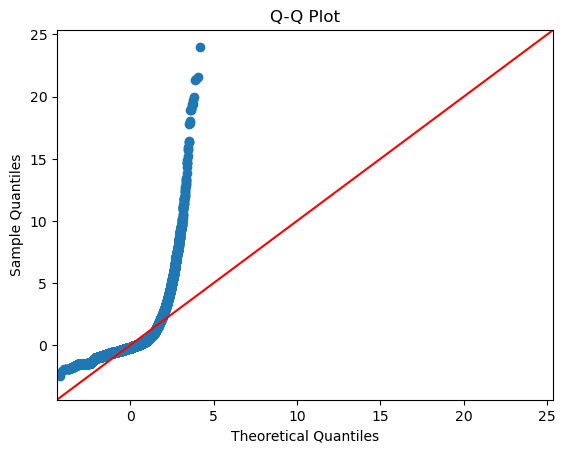

In [42]:
plt.figure(figsize=(10, 4))
sm.qqplot(m1.resid, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

Wow that is a terrible QQ plot. This shows that the residuals are nowhere close to a normal distribution. Let's run the Shapiro-Wilks test to see just how bad it is.

In [43]:
residuals = m1.resid.values
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", round(stat, 3))
print("p-value:", p_value)

Shapiro-Wilk Test Statistic: 0.617
p-value: 0.0


/Users/bychen/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The low p-value confirms that the residuals are not normally distributed and the test statistic is quite low as well. Let's check the homoskedasticity assumption.

In [44]:
bp_test = sms.het_breuschpagan(m1.resid, m1.model.exog)
bp_stat = round(bp_test[0])  
bp_p_value = round(bp_test[1]) 

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"P-value: {bp_p_value}")

Breusch-Pagan Test Statistic: 631
P-value: 0


Obviously the p value confirms heteroskedasticity, but I want to use the test statistic to compare with other models. Let's use the model to predict, then examine some error statistics.

In [45]:
ypred = m1.predict(Xtest)
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)

print(f"Mean Squared Error (MSE): {round(mse)}")
print(f"Mean Absolute Error (MAE): {round(mae)}")

Mean Squared Error (MSE): 2159870552
Mean Absolute Error (MAE): 25721


The mean squared error itself doesn't really signify much. It only becomes useful when we use it to compare with other models.

## Model 2

After examining the baseline model, I have a better understanding of what to do before fitting the next model. Here are my feature engineering ideas.
* Filter the dataset for full time or almost full time employees only. The FTE column seems to be very useful, but I think that including the low FTE entries are not helpful in a practical sense. I don't want my model to consider employees who are maybe hired for a couple months and paid a small stipend for their services.
* Remove outliers from the dataset. I want to concentrate my model on the "meat" of the dataset. The outliers mostly serve to increase the error of my model, so I think removing them will be appropriate.
* Having the job category column as a continuous predictor doesn't make sense because the numbers are just arbitrary labels. I will transform them into strings and use them as dummy variables.
* I think the university column can also be a good predictor. I'll try to add this in as a dummy variable as well.

In [46]:
df2 = df[df["FTE"] > 0.8]
df2 = df2[df2["FTE"] <= 1]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44179 entries, 1 to 98290
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           44179 non-null  object 
 1   Name                 44179 non-null  object 
 2   Employment Type      44179 non-null  object 
 3   Job Category         44179 non-null  int64  
 4   Class Title          44179 non-null  object 
 5   Annual Compensation  44179 non-null  float64
 6   Funding Source       44179 non-null  object 
 7   FTE                  44179 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [47]:
np.percentile(df2["Annual Compensation"], 10)

35553.776

In [48]:
np.percentile(df2["Annual Compensation"], 90)

136500.0

In [49]:
df2 = df2[df2["Annual Compensation"] > 35570]
df2 = df2[df2["Annual Compensation"] < 126480]

Text(0.5, 1.0, 'Annual Compensation Frequency Plot')

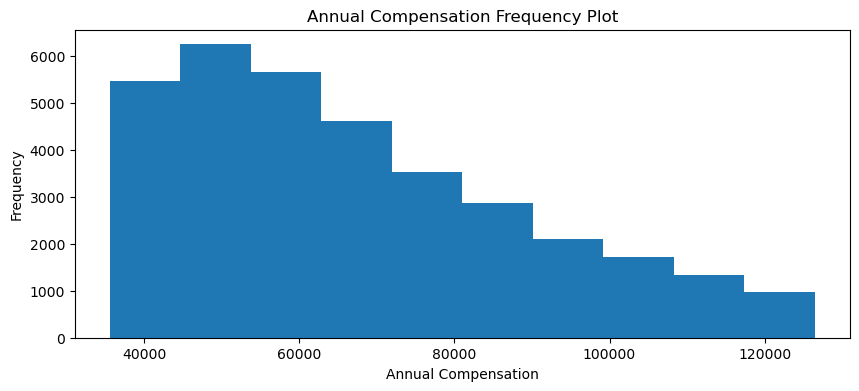

In [50]:
plt.figure(figsize=(10, 4))
plt.hist(df2["Annual Compensation"])
plt.xlabel("Annual Compensation")
plt.ylabel("Frequency")
plt.title("Annual Compensation Frequency Plot")

In [51]:
job_category_mapping = {
    1: "Core Operational and Support Staff",
    2: "Core Operational Supervisor",
    3: "Specialized Technical",
    4: "Non-Faculty Supplementary Personnel",
    5: "Temporary Instruction",
    6: "Full-Time Instruction",
    7: "Faculty Administrators",
    8: "Professionalized Occupation",
    9: "Professional",
    10: "Lower Level Managerial",
    11: "Higher Level Managerial",
    12: "Lower Level Executive",
    13: "Upper Level Executive"
}

df2["Job Category"] = df2["Job Category"].map(job_category_mapping)
df2.head()

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
1,FAMU,Ayinde Madzimoyo,Salaried,Full-Time Instruction,Assistant Professor,"67,500.00",Education and General,1.00
2,FAMU,Brian Crowell,Salaried,Professional,"Instructor, Librarian","51,897.74",Education and General,1.00
3,FAMU,Gwendovere Williams,Salaried,Specialized Technical,Administrative Assistant,"38,251.00",Contracts and Grants,1.00
5,FAMU,Derek Holloman,Salaried,Full-Time Instruction,Associate Professor,"122,157.25",Education and General,1.00
7,FAMU,George Epolito,Salaried,Full-Time Instruction,Associate Professor,"80,000.00",Education and General,1.00


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34543 entries, 1 to 98290
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           34543 non-null  object 
 1   Name                 34543 non-null  object 
 2   Employment Type      34543 non-null  object 
 3   Job Category         34543 non-null  object 
 4   Class Title          34543 non-null  object 
 5   Annual Compensation  34543 non-null  float64
 6   Funding Source       34543 non-null  object 
 7   FTE                  34543 non-null  float64
dtypes: float64(2), object(6)
memory usage: 2.4+ MB


Looking good. Let's fit the model now. 

In [53]:
X2 = pd.get_dummies(df2[["Job Category", "University"]], drop_first=True)
X2["FTE"] = df2["FTE"]
X2 = sm.add_constant(X2)
y2 = df2["Annual Compensation"]
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, random_state=69, train_size=0.8)
Xtrain2 = Xtrain2.astype(int)

In [54]:
m2 = sm.OLS(ytrain2, Xtrain2).fit()
print(m2.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.461
Model:                             OLS   Adj. R-squared:                  0.461
Method:                  Least Squares   F-statistic:                     1028.
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                         10:27:41   Log-Likelihood:            -3.0747e+05
No. Observations:                27634   AIC:                         6.150e+05
Df Residuals:                    27610   BIC:                         6.152e+05
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

The adjusted R squared of 0.461 is better than the previous 0.315. However, the dataset is much more "clean", since the outliers are removed, which definitely helped improve the adjusted R squared. I wanted to fit the m2 model on the m1 train and test to get a sense of how much the model itself improved, but I noticed that the usage of dummy variables in m2 makes it pointless to do so, since m1 train and test uses the floating "job category" column. Let's run some residual plots.

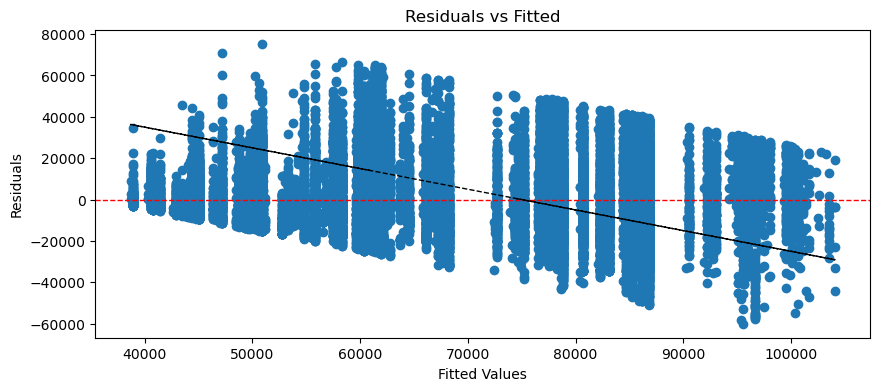

In [55]:
plt.figure(figsize=(10, 4))
plt.scatter(m2.fittedvalues, m2.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.plot(m2.fittedvalues, -m2.fittedvalues + 75000, color='black', linestyle='--', linewidth=1) 
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Seems the model is guessing too low for lower income employees and too high for higher income employees. Not exactly sure why. The pattern here seems to follow a slope of -1. If this was a simple linear regression model, I could just add a term in, but the present of multiple predictors, some of which are categorical, makes this difficult. Let's check for normality.

<Figure size 1000x400 with 0 Axes>

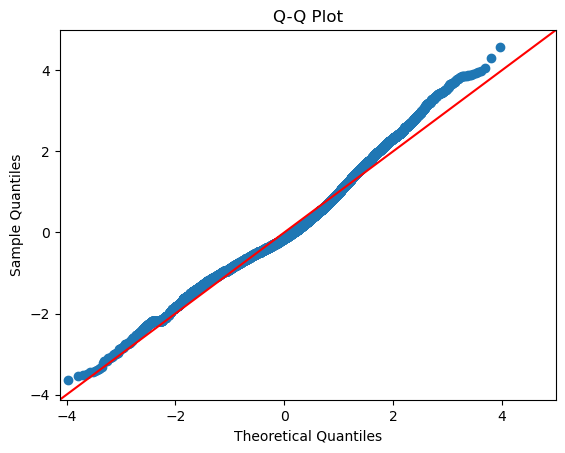

In [56]:
plt.figure(figsize=(10, 4))
sm.qqplot(m2.resid, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

Much much better looking QQ plot. Positive deviation for higher quantiles, suggesting extreme positive outliers, which makes sense. While I removed extremely high earning employees, the histogram of annual compensation from earlier still showed a strong right skew. I'll try to address this in the next model. Let's run the Shapiro-Wilks like we did last time. 

In [57]:
residuals = m2.resid.values
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", round(stat, 3))
print("p-value:", p_value)

Shapiro-Wilk Test Statistic: 0.978
p-value: 0.0


/Users/bychen/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Nice, 0.978 is significantly higher than the 0.617 from m1. Let's check heteroskedasticity.

In [58]:
bp_test = sms.het_breuschpagan(m2.resid, m2.model.exog)
bp_stat = round(bp_test[0])
bp_p_value = bp_test[1]  

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"P-value: {bp_p_value}")

Breusch-Pagan Test Statistic: 1938
P-value: 0.0


That's weird. The Breusch-Pagan Test Statistic increased from 631 to 1938. However, looking at the residual plots, the one for model 1 looks way more heteroskedastic than that of model 2. I asked ChatGPT, and I got this answer:

"The Breusch-Pagan test assumes a specific linear relationship between the squared residuals and the predictors. If the first model has non-linear heteroskedasticity (e.g., cone-shaped residuals) and the second model has a linear pattern, the second model might produce a larger test statistic, even if it looks better visually."

I think this perfectly describes our situation. The residual plot for model 1 shows a cone shape while the plot for model 2 shows a linear downward pattern. I will try to address this with the next model. For now, let's predict.

In [59]:
ypred2 = m2.predict(Xtest2)
mse2 = mean_squared_error(ytest2, ypred2)
mae2 = mean_absolute_error(ytest2, ypred2)

print(f"Mean Squared Error (MSE): {round(mse2)}")
print(f"Mean Absolute Error (MAE): {round(mae2)}")

Mean Squared Error (MSE): 282221594
Mean Absolute Error (MAE): 12958


Pretty good. The MSE decreased from 2159M to 282M and the MAE decreased from 26k to 13k. But we also have way less datapoints, so this isn't really that helpful.

## Model 3

Model 2 was a great improvement from the first one. Removing outliers fixed the normality problem, as shown by the linear QQ plot and the Shapiro-Wilks test statistic. However, heteroskedasticity increased from model 1 to model 2, although a pattern has formed in the residual plots, which might offer a clue as to how to fix this issue. The pattern seems so sharp that I'm suspecting that it has to be a systemic problem, not just a flaw of the model. My main goal for this model is to fix the heteroskedasticity issue. I will first start by examining model 2 in detail to see if a mistake somewhere is causing this pattern in the residual plot. If that doesn't work, I'll try fitting different models. I really don't have a solution in mind so I'm just going to try different things until something hopefully works.

In [60]:
df.head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
0,FAMU,William Thomson,Salaried,9,Senior Auditor,"9,225.00",Auxiliary,0.12
1,FAMU,Ayinde Madzimoyo,Salaried,6,Assistant Professor,"67,500.00",Education and General,1.00
2,FAMU,Brian Crowell,Salaried,9,"Instructor, Librarian","51,897.74",Education and General,1.00


In [61]:
df2.head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE
1,FAMU,Ayinde Madzimoyo,Salaried,Full-Time Instruction,Assistant Professor,"67,500.00",Education and General,1.00
2,FAMU,Brian Crowell,Salaried,Professional,"Instructor, Librarian","51,897.74",Education and General,1.00
3,FAMU,Gwendovere Williams,Salaried,Specialized Technical,Administrative Assistant,"38,251.00",Contracts and Grants,1.00


The two dataframes seem to line up fine. The difference in starting index shouldn't matter much.

In [62]:
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X2, y2, random_state=69, train_size=0.8)
print(Xtrain3.dtypes)

const                                               float64
Job Category_Core Operational and Support Staff        bool
Job Category_Faculty Administrators                    bool
Job Category_Full-Time Instruction                     bool
Job Category_Higher Level Managerial                   bool
Job Category_Lower Level Executive                     bool
Job Category_Lower Level Managerial                    bool
Job Category_Non-Faculty Supplementary Personnel       bool
Job Category_Professional                              bool
Job Category_Professionalized Occupation               bool
Job Category_Specialized Technical                     bool
Job Category_Temporary Instruction                     bool
University_FAU                                         bool
University_FGCU                                        bool
University_FIU                                         bool
University_FPU                                         bool
University_FSU                          

In [63]:
Xtrain3 = Xtrain3.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)
print(Xtrain3.dtypes)

const                                               float64
Job Category_Core Operational and Support Staff     float64
Job Category_Faculty Administrators                 float64
Job Category_Full-Time Instruction                  float64
Job Category_Higher Level Managerial                float64
Job Category_Lower Level Executive                  float64
Job Category_Lower Level Managerial                 float64
Job Category_Non-Faculty Supplementary Personnel    float64
Job Category_Professional                           float64
Job Category_Professionalized Occupation            float64
Job Category_Specialized Technical                  float64
Job Category_Temporary Instruction                  float64
University_FAU                                      float64
University_FGCU                                     float64
University_FIU                                      float64
University_FPU                                      float64
University_FSU                          

In [64]:
m3 = sm.OLS(ytrain3, Xtrain3).fit()
print(m3.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.461
Model:                             OLS   Adj. R-squared:                  0.461
Method:                  Least Squares   F-statistic:                     1028.
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                         10:27:42   Log-Likelihood:            -3.0747e+05
No. Observations:                27634   AIC:                         6.150e+05
Df Residuals:                    27610   BIC:                         6.152e+05
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

I noticed that I was coercing FTE into integers, which rounds all of them to basically 1, rendering them useless. Keeping FTE as a float allowed it to be a significant predictor, as the p value is now 0.035. However, it didn't seem to improve the overall model. Let's check for multicollinearity.


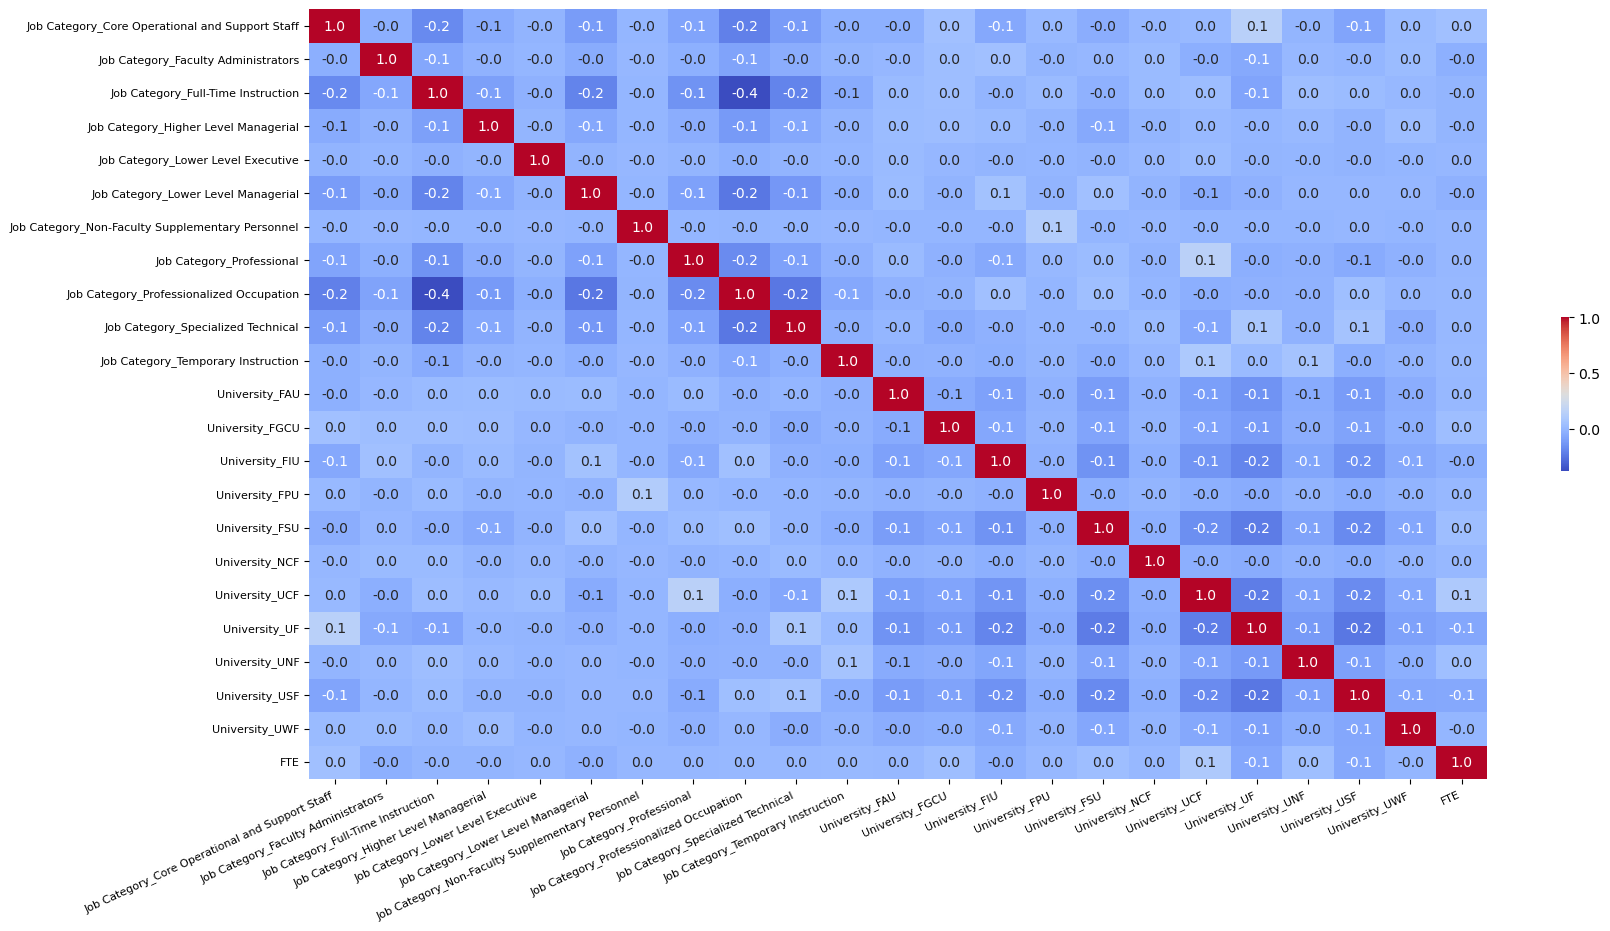

In [65]:
plt.figure(figsize=(19, 10))
corr_matrix = Xtrain3.corr()
corr_matrix = corr_matrix.drop('const', axis=1).drop('const', axis=0)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 10}, cbar_kws={"shrink": 0.2})
plt.xticks(rotation=25, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

There's very little evidence for multicollinearity between the predictors, which is great for the model, but it also means that I still can't figure out how to address heteroskedasticity. Looking back at the FTE vs Annual Compensation plot earlier, I noticed that the relationship is not linear, but more exponential. Let's try adding an exponential term into the model. 

In [66]:
df2["FTE Squared"] = df2["FTE"] ** 2
df2.head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE,FTE Squared
1,FAMU,Ayinde Madzimoyo,Salaried,Full-Time Instruction,Assistant Professor,"67,500.00",Education and General,1.00,1.00
2,FAMU,Brian Crowell,Salaried,Professional,"Instructor, Librarian","51,897.74",Education and General,1.00,1.00
3,FAMU,Gwendovere Williams,Salaried,Specialized Technical,Administrative Assistant,"38,251.00",Contracts and Grants,1.00,1.00


In [67]:
X3 = pd.get_dummies(df2[["Job Category", "University"]], drop_first=True)
X3["FTE Squared"] = df2["FTE Squared"]
X3 = sm.add_constant(X3)
y3 = df2["Annual Compensation"]
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, random_state=69, train_size=0.8)
Xtrain3 = Xtrain3.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)
m3 = sm.OLS(ytrain3, Xtrain3).fit()
print(m3.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.461
Model:                             OLS   Adj. R-squared:                  0.461
Method:                  Least Squares   F-statistic:                     1028.
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                         10:27:44   Log-Likelihood:            -3.0747e+05
No. Observations:                27634   AIC:                         6.150e+05
Df Residuals:                    27610   BIC:                         6.152e+05
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

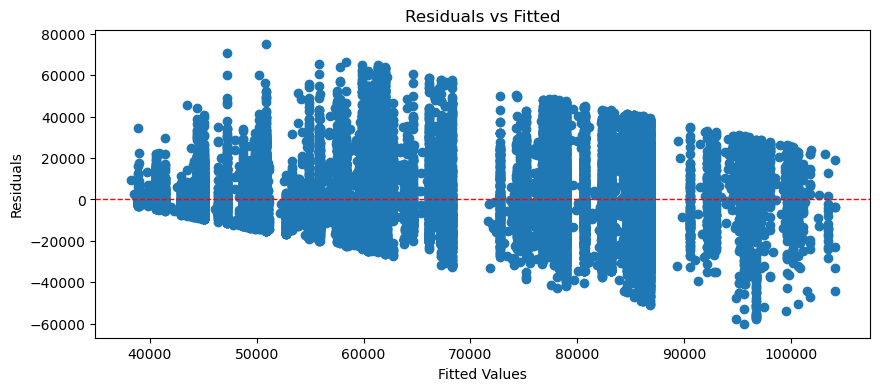

In [68]:
plt.figure(figsize=(10, 4))
plt.scatter(m3.fittedvalues, m3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Didn't do anything. Makes sense, since the FTE is cut off at 0.8 in df2, so there isn't much to work with. Let's try doing a weighted least squares regression.

In [69]:
residuals = m3.resid
weights = 1 / (residuals**2)

In [70]:
m3 = sm.WLS(ytrain3, Xtrain3, weights=weights).fit()

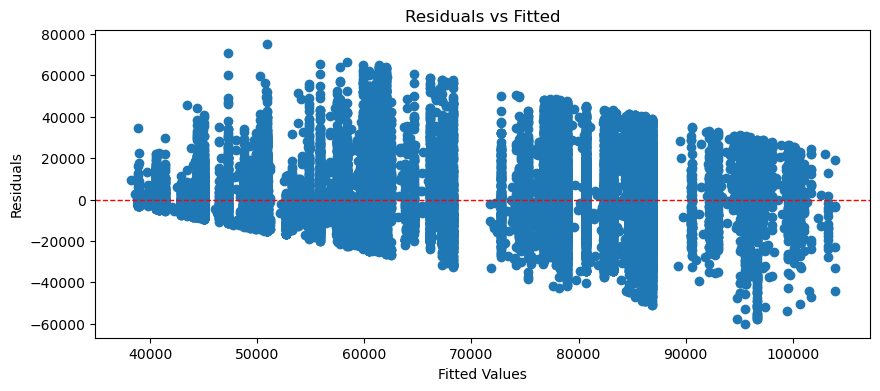

In [71]:
plt.figure(figsize=(10, 4))
plt.scatter(m3.fittedvalues, m3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Nothing changed . Let's try doing some transformations on the target variable.

In [72]:
X3 = pd.get_dummies(df2[["Job Category", "University"]], drop_first=True)
X3["FTE"] = df2["FTE"]
X3 = sm.add_constant(X3)

df2["Log Annual Compensation"] = np.log(df2["Annual Compensation"])

y3 = df2["Log Annual Compensation"]
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, random_state=69, train_size=0.8)
Xtrain3 = Xtrain3.astype(int)
m3 = sm.OLS(ytrain3, Xtrain3).fit()
print(m3.summary())

                               OLS Regression Results                              
Dep. Variable:     Log Annual Compensation   R-squared:                       0.492
Model:                                 OLS   Adj. R-squared:                  0.492
Method:                      Least Squares   F-statistic:                     1163.
Date:                     Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                             10:27:45   Log-Likelihood:                 1289.9
No. Observations:                    27634   AIC:                            -2532.
Df Residuals:                        27610   BIC:                            -2334.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<Figure size 1000x400 with 0 Axes>

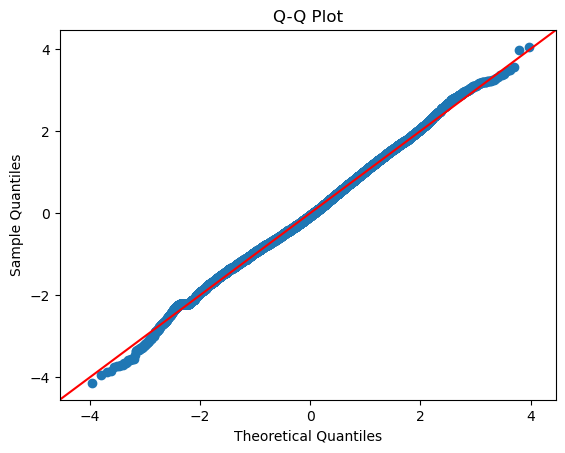

In [73]:
plt.figure(figsize=(10, 4))
sm.qqplot(m3.resid, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

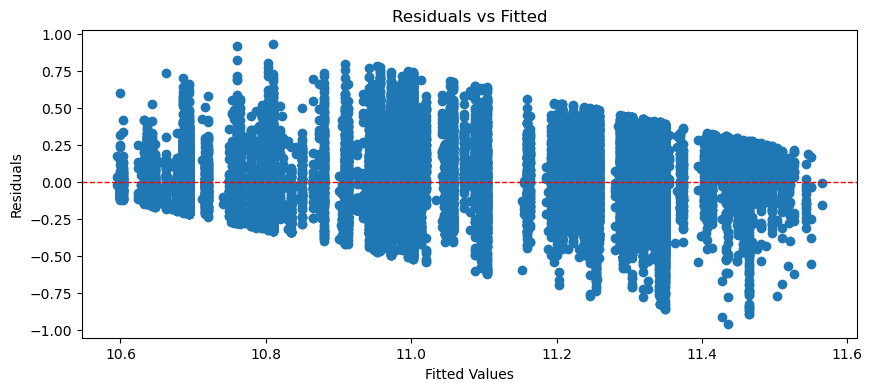

In [74]:
plt.figure(figsize=(10, 4))
plt.scatter(m3.fittedvalues, m3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [75]:
ypred3 = np.exp(pd.to_numeric(m3.predict(Xtest3)))
mse3 = mean_squared_error(ytest3, ypred3)
mae3 = mean_absolute_error(ytest3, ypred3)

print(f"Mean Squared Error (MSE): {round(mse3)}")
print(f"Mean Absolute Error (MAE): {round(mae3)}")

Mean Squared Error (MSE): 4519845674
Mean Absolute Error (MAE): 65611


Using the log transformation on the target variable, I obtained a higher adjusted R squared and a better QQ plot, but the heteroskedasticity was not fixed and the predictions got way worse. Let's try to narrow down the problem by going back to the m2 model and trying different predictors.

In [76]:
X3 = pd.get_dummies(df2["Job Category"], drop_first=True)
X3["FTE"] = df2["FTE"]
X3 = sm.add_constant(X3)
y3 = df2["Annual Compensation"]
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, random_state=69, train_size=0.8)
Xtrain3 = Xtrain3.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)

In [77]:
m3 = sm.OLS(ytrain3, Xtrain3).fit()
print(m3.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.454
Model:                             OLS   Adj. R-squared:                  0.454
Method:                  Least Squares   F-statistic:                     1916.
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                         10:27:45   Log-Likelihood:            -3.0765e+05
No. Observations:                27634   AIC:                         6.153e+05
Df Residuals:                    27621   BIC:                         6.154e+05
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

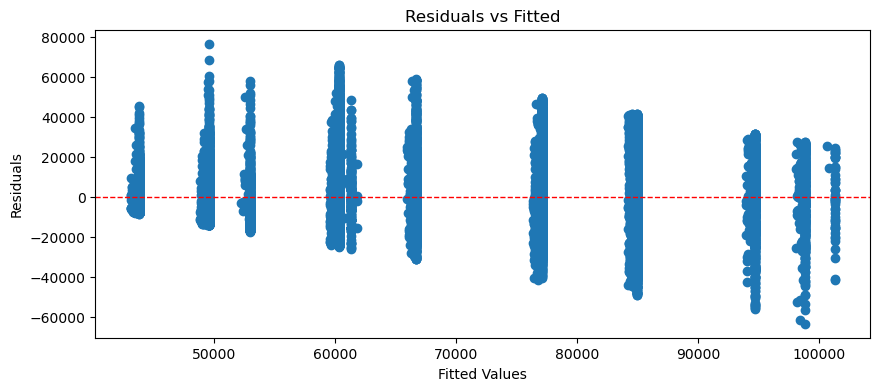

In [78]:
plt.figure(figsize=(10, 4))
plt.scatter(m3.fittedvalues, m3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Very interesting. The downward trend is already present. Now for the other categorical predictor.

In [79]:
X3 = pd.get_dummies(df2["University"], drop_first=True)
X3["FTE"] = df2["FTE"]
X3 = sm.add_constant(X3)
y3 = df2["Annual Compensation"]
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, random_state=69, train_size=0.8)
Xtrain3 = Xtrain3.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     18.80
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):           2.54e-41
Time:                         10:27:46   Log-Likelihood:            -3.1591e+05
No. Observations:                27634   AIC:                         6.318e+05
Df Residuals:                    27621   BIC:                         6.319e+05
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.277e+04   4952.290     18.73

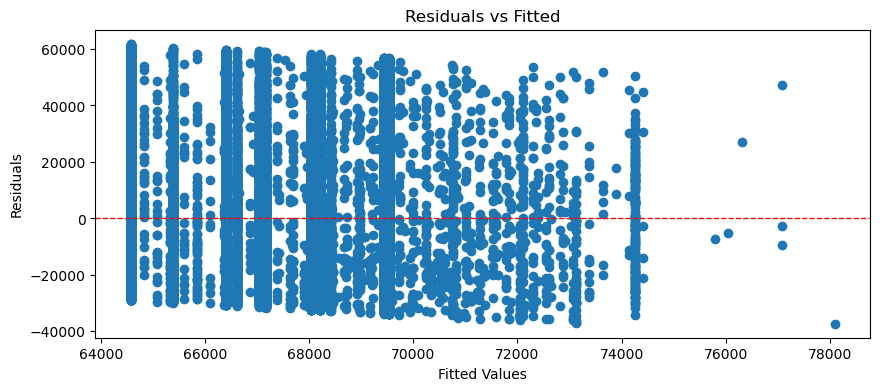

In [80]:
m3 = sm.OLS(ytrain3, Xtrain3).fit()
print(m3.summary())

plt.figure(figsize=(10, 4))
plt.scatter(m3.fittedvalues, m3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The predictive power on this one is terrible, but there are no clear downward trends in this graph. It looks like job category is the culprit here. I'm thinking back to the earlier section where I graphed annual compensation against job categories. Here's the plot again as a reminder.

Text(0.5, 1.0, 'Median Compensation for each Job')

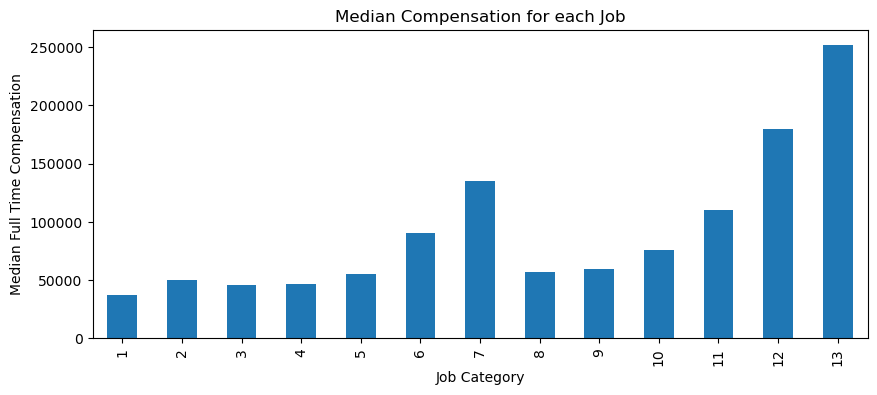

In [81]:
plt.figure(figsize=(10, 4))
comp_by_job.plot(kind = "bar")
plt.ylabel("Median Full Time Compensation")
plt.title("Median Compensation for each Job")

Here's my thought process: What if I move categories 6 and 7 up higher towards the right, and then use the job category numbers as a continuous variable? I used job category as a continuous variable in model 1 and it didn't seem like there was a linear heteroskedasticity issue. I might lose some interpretability for the model (job category will no longer makes sense) but I think it's worth a try.

In [82]:
reorder_mapping = {
    1: 1,
    2: 3,
    3: 2,
    4: 6,
    5: 5,
    6: 9,  
    7: 11,  
    8: 4,
    9: 7,
    10: 8,
    11: 10,
    12: 12,
    13: 13,
}

df2["New Job Category"] = df["Job Category"].map(reorder_mapping)

Text(0.5, 1.0, 'Median Compensation for each Job')

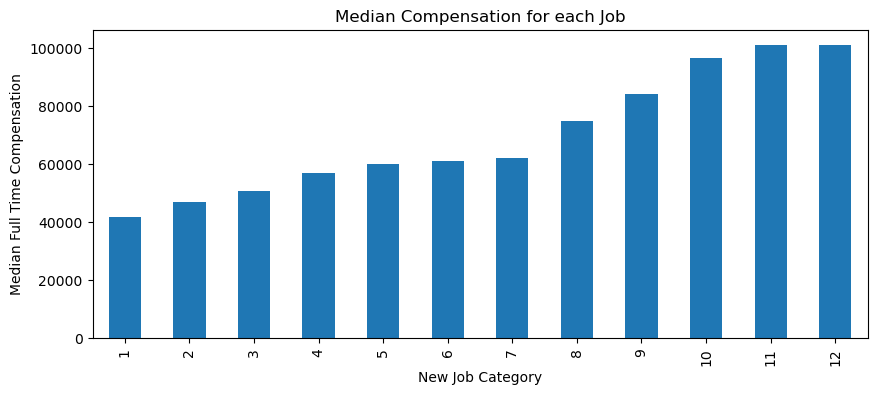

In [83]:
plt.figure(figsize=(10, 4))
comp_by_new_job = df2.groupby("New Job Category")["Annual Compensation"].median()
comp_by_new_job.plot(kind = "bar")
plt.ylabel("Median Full Time Compensation")
plt.title("Median Compensation for each Job")

Perfect. Now let's run the model, this time using New Job Category as a continuous variable.

In [84]:
X3 = df2[["New Job Category", "FTE"]]
X3 = pd.get_dummies(df2["Job Category"], drop_first=True)
X3 = sm.add_constant(X3)
y3 = df2["Annual Compensation"]
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, random_state=69, train_size=0.8)
Xtrain3 = Xtrain3.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)

In [85]:
m3 = sm.OLS(ytrain3, Xtrain3).fit()
print(m3.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual Compensation   R-squared:                       0.454
Model:                             OLS   Adj. R-squared:                  0.454
Method:                  Least Squares   F-statistic:                     2090.
Date:                 Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                         10:27:47   Log-Likelihood:            -3.0765e+05
No. Observations:                27634   AIC:                         6.153e+05
Df Residuals:                    27622   BIC:                         6.154e+05
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

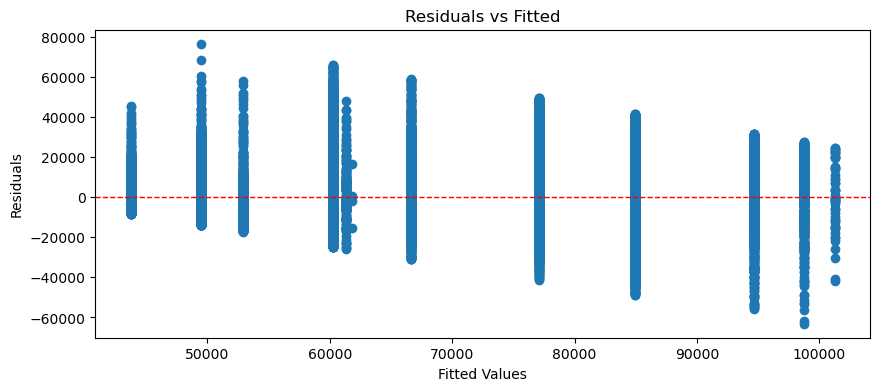

In [86]:
plt.figure(figsize=(10, 4))
plt.scatter(m3.fittedvalues, m3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [87]:
ypred3 = m3.predict(Xtest3)
mse3 = mean_squared_error(ytest3, ypred3)
mae3 = mean_absolute_error(ytest3, ypred3)

print(f"Mean Squared Error (MSE): {round(mse3)}")
print(f"Mean Absolute Error (MAE): {round(mae3)}")

Mean Squared Error (MSE): 286037229
Mean Absolute Error (MAE): 13068


Damn, I thought I was on to something. 

## Summary

In this section, I tried using regression techniques to predict annual compensation based on a variety of predictor variables. In the first model, I created a simple formula which performed quite poorly. In the second model, I observed the shortcomings of the first model to create a decent model that gave much better predictions. However, the residual plot showed a pattern indicating heteroskedasticity. In model 3, I tried to debug model 2 to address this issue, and in the process I created some different models, all with their advantages and disadvantages. However, the heteroskedasticity issue remains unsolved. It looks like model 2 is about the best regression model that I can create.

I'm getting kinda bored with regression. Let's look into decision trees.

# Part 3: Decision Trees

I want to preface this by saying that I know much less about decision trees than I do with regression. Unfortunately, the stats department at UF don't offer a class on it, at least not for undergrads. I'll probably stick to simple models, since I don't feel confident in using more complex techniques.

## Model 1

I'll start with the most basic model, using the same X and y variables as I did in model 1 of regression. I will use a decision tree then compare its metrics against that of m1 regression.

In [88]:
X = df[["Job Category", "FTE"]]
y = df["Annual Compensation"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=69, train_size=0.8)
t1 = DecisionTreeRegressor(random_state=69)
t1.fit(Xtrain, ytrain)

DecisionTreeRegressor(random_state=69)

In [89]:
ypred_train = t1.predict(Xtrain)
ypred_test = t1.predict(Xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
mae_train = mean_absolute_error(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)
mae_test = mean_absolute_error(ytest, ypred_test)

print(f"Training MSE: {round(mse_train)}, Training MAE: {round(mae_train)}")
print(f"Testing MSE: {round(mse_test)}, Testing MAE: {round(mae_test)}")

Training MSE: 1176112689, Training MAE: 15820
Testing MSE: 1202541631, Testing MAE: 16349


In [90]:
rsquared_train = round(t1.score(Xtrain, ytrain), 3)
rsquared_test = round(t1.score(Xtest, ytest), 3)

print(f"Training R²: {rsquared_train}")
print(f"Testing R²: {rsquared_test}")

Training R²: 0.63
Testing R²: 0.624


Very good start. The R squared is already much higher than that of m1 from regression. Both the MAE and MSE are much lower than that of m1. I tried plotting the entire tree diagram but it was way too complex and not useful at all. Instead, let's try some other plots.

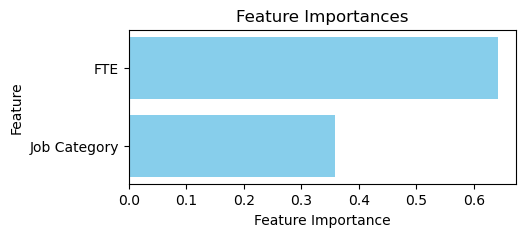

In [91]:
importances = t1.feature_importances_
features = X.columns.tolist()

plt.figure(figsize=(5, 2))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Interesting, FTE seems to be quite useful. Makes sense, since FTE goes all the way from 0 to 1 in the dataframe "df". 

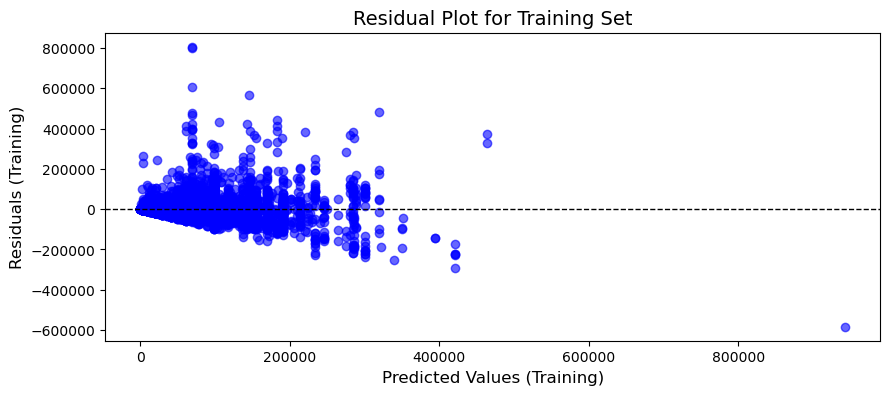

In [92]:
test_resid = ytest - ypred_test

plt.figure(figsize=(10, 4))
plt.scatter(ypred_test, test_resid, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Training)', fontsize=12)
plt.ylabel('Residuals (Training)', fontsize=12)
plt.title('Residual Plot for Training Set', fontsize=14)
plt.show()

There's that familiar downward pattern again. Seems like switching from regression to decision trees didn't help.

## Model 2

For this model, I'll make a new dataframe called df3 which is the same as df2, but the Job Category will remain as integers. I'll also use cross validation to find the ideal max depth, then use that to prune the tree to prevent overfitting.

In [93]:
df3 = df2
df3["Job Category"] = df["Job Category"]
df3.head(3)

,University,Name,Employment Type,Job Category,Class Title,Annual Compensation,Funding Source,FTE,FTE Squared,Log Annual Compensation,New Job Category
1,FAMU,Ayinde Madzimoyo,Salaried,6,Assistant Professor,"67,500.00",Education and General,1.00,1.00,11.12,9
2,FAMU,Brian Crowell,Salaried,9,"Instructor, Librarian","51,897.74",Education and General,1.00,1.00,10.86,7
3,FAMU,Gwendovere Williams,Salaried,3,Administrative Assistant,"38,251.00",Contracts and Grants,1.00,1.00,10.55,2


In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34543 entries, 1 to 98290
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   University               34543 non-null  object 
 1   Name                     34543 non-null  object 
 2   Employment Type          34543 non-null  object 
 3   Job Category             34543 non-null  int64  
 4   Class Title              34543 non-null  object 
 5   Annual Compensation      34543 non-null  float64
 6   Funding Source           34543 non-null  object 
 7   FTE                      34543 non-null  float64
 8   FTE Squared              34543 non-null  float64
 9   Log Annual Compensation  34543 non-null  float64
 10  New Job Category         34543 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 3.2+ MB


In [95]:
X2 = df3[["Job Category", "FTE"]]
y2 = df3["Annual Compensation"]
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, random_state=69, train_size=0.8)
t2 = DecisionTreeRegressor(random_state=69)
t2.fit(Xtrain2, ytrain2)

DecisionTreeRegressor(random_state=69)

In [96]:
param_grid = {'max_depth': range(1, 30)} 
grid_search = GridSearchCV(estimator=t2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Xtrain2, ytrain2)

print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

Best max_depth: 5
Best cross-validation score (negative MSE): -273956273.8444534


In [97]:
t2 = DecisionTreeRegressor(random_state=69, max_depth = 5)
t2.fit(Xtrain2, ytrain2)

ypred_train2 = t2.predict(Xtrain2)
ypred_test2 = t2.predict(Xtest2)

mse_train2 = mean_squared_error(ytrain2, ypred_train2)
mae_train2 = mean_absolute_error(ytrain2, ypred_train2)
mse_test2 = mean_squared_error(ytest2, ypred_test2)
mae_test2 = mean_absolute_error(ytest2, ypred_test2)

print(f"Training MSE: {round(mse_train2)}, Training MAE: {round(mae_train2)}")
print(f"Testing MSE: {round(mse_test2)}, Testing MAE: {round(mae_test2)}")

Training MSE: 273055279, Training MAE: 12786
Testing MSE: 286458566, Testing MAE: 13074


In [98]:
rsquared_train2 = round(t2.score(Xtrain2, ytrain2), 3)
rsquared_test2 = round(t2.score(Xtest2, ytest2), 3)

print(f"Training R²: {rsquared_train2}")
print(f"Testing R²: {rsquared_test2}")

Training R²: 0.456
Testing R²: 0.442


Looks like there is a tradeoff going on here between R squared and error metrics. The R squared (for testing) decreased from 0.624 to 0.442, but the MSE and MAE both decreased as well. I suspect that the removal of rows containing FTEs below 0.8 prevented the model from using the FTE predictor to effectively explain the variability in the target variable. It's interesting to note that the metrics from t2 are remarkably close to that of m2. Let's compare them real quick.

In [99]:
m2_vs_t2 = {
    "Model": ["m2", "t2"],
    "R Squared": [0.461, 0.442],
    "MSE": ["282M", "286M"],
    "MAE": ["12958", "13074"]
}

m2_vs_t2 = tabulate(m2_vs_t2, headers="keys", tablefmt="fancy_grid")
print(m2_vs_t2)

╒═════════╤═════════════╤═══════╤═══════╕
│ Model   │   R Squared │ MSE   │   MAE │
╞═════════╪═════════════╪═══════╪═══════╡
│ m2      │       0.461 │ 282M  │ 12958 │
├─────────┼─────────────┼───────┼───────┤
│ t2      │       0.442 │ 286M  │ 13074 │
╘═════════╧═════════════╧═══════╧═══════╛


t2 is actually underperforming m2. Let's create the same plots as we did in t1.

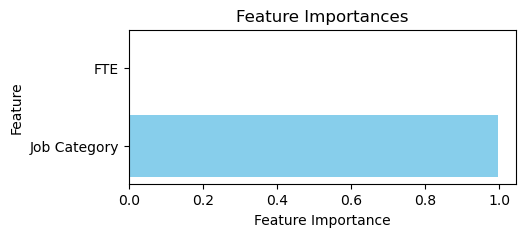

In [100]:
importances2 = t2.feature_importances_
features2 = X2.columns.tolist()

plt.figure(figsize=(5, 2))
plt.barh(features2, importances2, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Just as I predicted. The FTE predictor has become basically useless. I might edit df3 to set a lower cutoff for FTE for the next model.

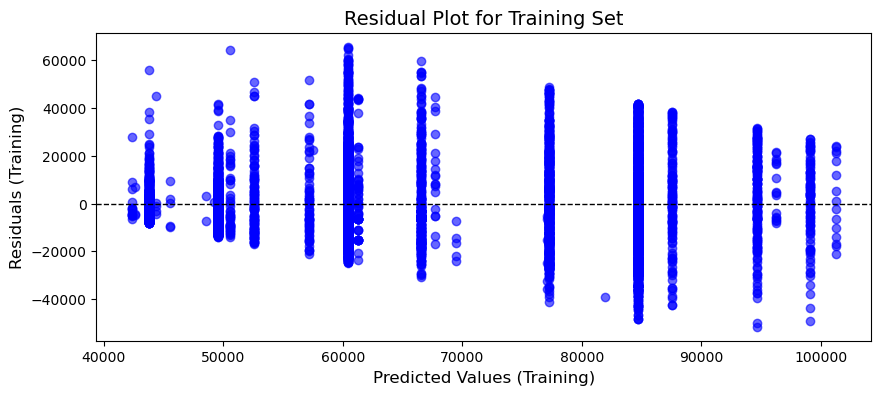

In [101]:
test_resid2 = ytest2 - ypred_test2

plt.figure(figsize=(10, 4))
plt.scatter(ypred_test2, test_resid2, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Training)', fontsize=12)
plt.ylabel('Residuals (Training)', fontsize=12)
plt.title('Residual Plot for Training Set', fontsize=14)
plt.show()

Very similar to the residual plot from earlier when I used only Job Category for regression.

## Model 3

Let me just use a different cutoff for FTE and see if that improves our model.

In [102]:
df3 = df[df["FTE"] > 0.5]
df3 = df3[df3["FTE"] <= 1]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50589 entries, 1 to 98290
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           50589 non-null  object 
 1   Name                 50589 non-null  object 
 2   Employment Type      50589 non-null  object 
 3   Job Category         50589 non-null  int64  
 4   Class Title          50589 non-null  object 
 5   Annual Compensation  50589 non-null  float64
 6   Funding Source       50589 non-null  object 
 7   FTE                  50589 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.5+ MB


In [103]:
df3 = df3[df3["Annual Compensation"] > 35570]
df3 = df3[df3["Annual Compensation"] < 126480]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38455 entries, 1 to 98290
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   University           38455 non-null  object 
 1   Name                 38455 non-null  object 
 2   Employment Type      38455 non-null  object 
 3   Job Category         38455 non-null  int64  
 4   Class Title          38455 non-null  object 
 5   Annual Compensation  38455 non-null  float64
 6   Funding Source       38455 non-null  object 
 7   FTE                  38455 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ MB


In [104]:
X3 = df3[["Job Category", "FTE"]]
y3 = df3["Annual Compensation"]
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, random_state=69, train_size=0.8)
t3 = DecisionTreeRegressor(random_state=69)
t3.fit(Xtrain3, ytrain3)

DecisionTreeRegressor(random_state=69)

In [105]:
param_grid = {'max_depth': range(1, 30)} 
grid_search = GridSearchCV(estimator=t3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Xtrain3, ytrain3)

print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

Best max_depth: 6
Best cross-validation score (negative MSE): -286196301.25378174


In [106]:
t3 = DecisionTreeRegressor(random_state=69, max_depth=6)
t3.fit(Xtrain3, ytrain3)

ypred_train3 = t3.predict(Xtrain3)
ypred_test3 = t3.predict(Xtest3)

mse_train3 = mean_squared_error(ytrain3, ypred_train3)
mae_train3 = mean_absolute_error(ytrain3, ypred_train3)
mse_test3 = mean_squared_error(ytest3, ypred_test3)
mae_test3 = mean_absolute_error(ytest3, ypred_test3)

print(f"Training MSE: {round(mse_train3)}, Training MAE: {round(mae_train3)}")
print(f"Testing MSE: {round(mse_test3)}, Testing MAE: {round(mae_test3)}")

Training MSE: 284212003, Training MAE: 13075
Testing MSE: 275212668, Testing MAE: 12814


In [107]:
rsquared_train3 = round(t3.score(Xtrain3, ytrain3), 3)
rsquared_test3 = round(t3.score(Xtest3, ytest3), 3)

print(f"Training R²: {rsquared_train3}")
print(f"Testing R²: {rsquared_test3}")

Training R²: 0.44
Testing R²: 0.452


In [108]:
m2_vs_t3 = {
    "Model": ["m2", "t3"],
    "R Squared": [0.461, 0.452],
    "MSE": ["282M", "275M"],
    "MAE": ["12958", "12814"]
}

m2_vs_t3 = tabulate(m2_vs_t3, headers="keys", tablefmt="fancy_grid")
print(m2_vs_t3)

╒═════════╤═════════════╤═══════╤═══════╕
│ Model   │   R Squared │ MSE   │   MAE │
╞═════════╪═════════════╪═══════╪═══════╡
│ m2      │       0.461 │ 282M  │ 12958 │
├─────────┼─────────────┼───────┼───────┤
│ t3      │       0.452 │ 275M  │ 12814 │
╘═════════╧═════════════╧═══════╧═══════╛


Not bad! Now it's beating m2 in error metrics, but still lacking in R squared. Let's plot.

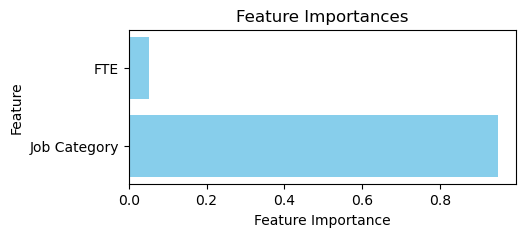

In [109]:
importances3 = t3.feature_importances_
features3 = X3.columns.tolist()

plt.figure(figsize=(5, 2))
plt.barh(features3, importances3, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

FTE is now kinda useful. 

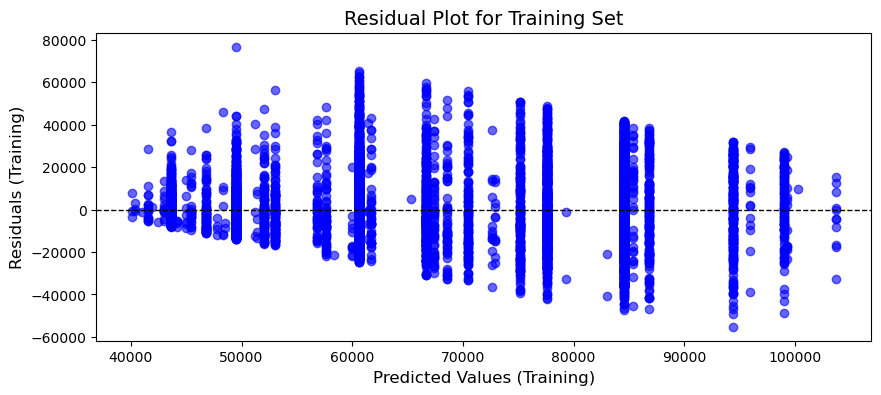

In [110]:
test_resid3 = ytest3 - ypred_test3

plt.figure(figsize=(10, 4))
plt.scatter(ypred_test3, test_resid3, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Training)', fontsize=12)
plt.ylabel('Residuals (Training)', fontsize=12)
plt.title('Residual Plot for Training Set', fontsize=14)
plt.show()

Same as usual.

## Summary

Like I mentioned in the beginning, I don't have much experience with decision trees. However, I still ended up with a model that performed comparably to my best regression model, so I'm pretty satisfied. As I continue my education in ML, I will learn more techniques and be able to try different things in the future. I really want to try random forests in my next project because I've heard a lot about them. After that, I want to get into neural networks and other more advanced subjects. 

That's it for this project! Hope you enjoyed.